In [2]:
%matplotlib inline
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from matplotlib.image import imread
from matplotlib.patches import Ellipse

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Challenge 1

<ipython-input-3-9d0f5a9ac88e>:3: RuntimeWarning: covariance is not positive-semidefinite.
  X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))
<ipython-input-3-9d0f5a9ac88e>:4: RuntimeWarning: covariance is not positive-semidefinite.
  X_gaussians.extend(np.random.multivariate_normal([4,0], [[0.2,1.5],[1.5,3]], 100))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass shuffle=200 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Moons')

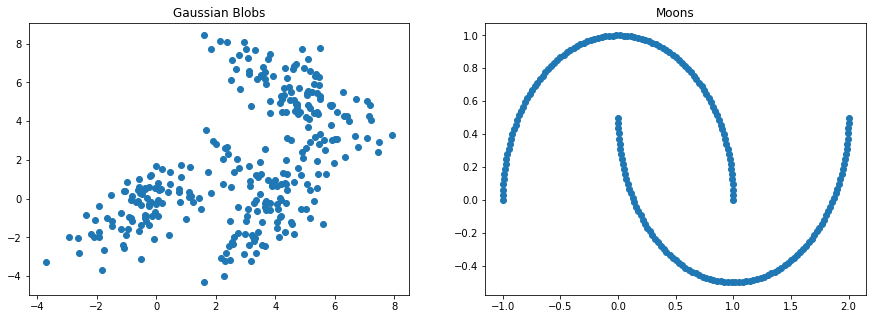

In [3]:
X_gaussians = []
X_gaussians.extend(np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 100))
X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))
X_gaussians.extend(np.random.multivariate_normal([4,0], [[0.2,1.5],[1.5,3]], 100))

X_gaussians = np.asarray(X_gaussians)
X_moons = sklearn.datasets.make_moons(200,200)[0]

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1])
plt.title('Gaussian Blobs')
plt.subplot(1, 2, 2)
plt.scatter(X_moons[:,0],X_moons[:,1])
plt.title('Moons')

Text(0.5, 1.0, 'Moons')

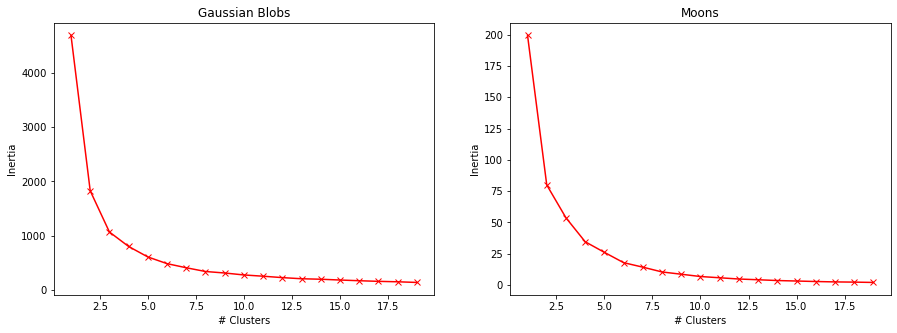

In [4]:
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_gaussians)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")
plt.title('Gaussian Blobs')

inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_moons)
    inertias.append(kmeans.inertia_)
plt.subplot(1, 2, 2)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")
plt.title('Moons')

Text(0.5, 1.0, 'Moons')

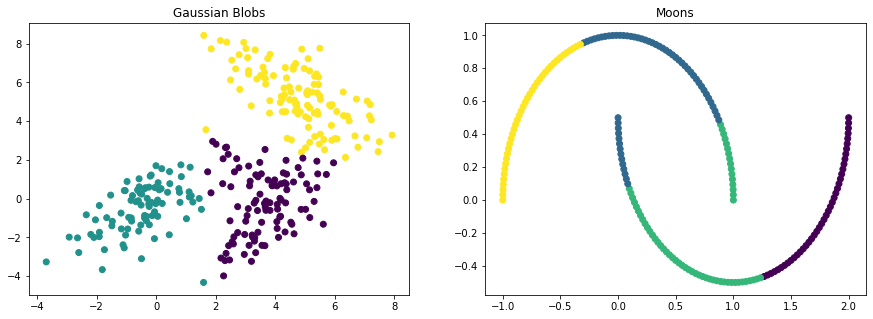

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters = 3).fit(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=kmeans.labels_)
plt.title('Gaussian Blobs')
plt.subplot(1,2,2)
kmeans = KMeans(n_clusters = 4).fit(X_moons)
plt.scatter(X_moons[:,0],X_moons[:,1],c=kmeans.labels_)
plt.title('Moons')

# Challenge 2

<ipython-input-358-ee880ba752dd>:2: RuntimeWarning: covariance is not positive-semidefinite.
  X_blobs.extend(np.random.multivariate_normal([-0.5,-0.5], [[-0.5,0.4],[0.4,-0.5]], 100))
<ipython-input-358-ee880ba752dd>:3: RuntimeWarning: covariance is not positive-semidefinite.
  X_blobs.extend(np.random.multivariate_normal([1,1], [[-0.5,0.48],[0.48,-0.5]], 100))
<ipython-input-358-ee880ba752dd>:4: RuntimeWarning: covariance is not positive-semidefinite.
  X_blobs.extend(np.random.multivariate_normal([2,2], [[-0.2,0.3],[0.3,-0.6]], 100))


Text(0.5, 1.0, 'KMeans')

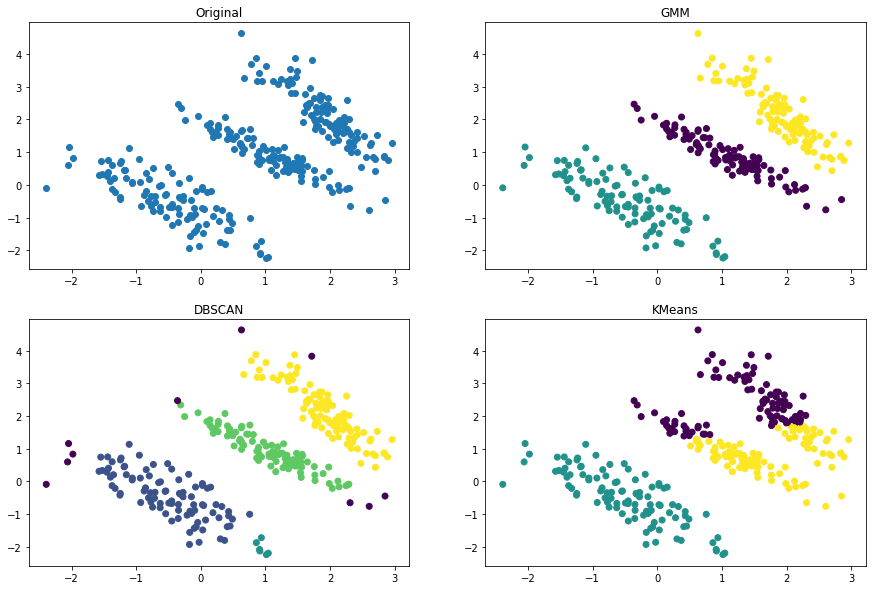

In [358]:
X_blobs = []
X_blobs.extend(np.random.multivariate_normal([-0.5,-0.5], [[-0.5,0.4],[0.4,-0.5]], 100))
X_blobs.extend(np.random.multivariate_normal([1,1], [[-0.5,0.48],[0.48,-0.5]], 100))
X_blobs.extend(np.random.multivariate_normal([2,2], [[-0.2,0.3],[0.3,-0.6]], 100))
X_blobs = np.asarray(X_blobs)

gmm = GMM(n_components=3,covariance_type='full').fit(X_blobs).predict(X_blobs)
dbscan = DBSCAN(eps=0.4, min_samples=5).fit(X_blobs)
kmeans = KMeans(n_clusters = 3).fit(X_blobs)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(X_blobs[:,0],X_blobs[:,1])
plt.title('Original')
plt.subplot(2,2,2)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=gmm)
plt.title('GMM')
plt.subplot(2,2,3)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=dbscan.labels_)
plt.title('DBSCAN')
plt.subplot(2,2,4)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=kmeans.labels_) 
plt.title('KMeans')

# Challenge 3

(478, 726, 4)


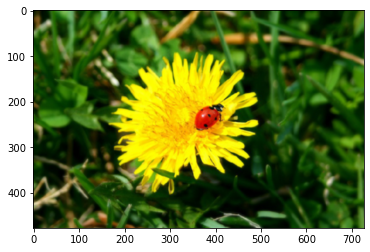

In [3]:
image = imread("/Users/alan/Desktop/ladybug.png")
plt.imshow(image)
print(image.shape)

In [3]:
image

array([[[0.03529412, 0.08627451, 0.01176471, 1.        ],
        [0.03921569, 0.09411765, 0.01176471, 1.        ],
        [0.04705882, 0.10196079, 0.00784314, 1.        ],
        ...,
        [0.3882353 , 0.49019608, 0.10588235, 1.        ],
        [0.39607844, 0.5019608 , 0.11372549, 1.        ],
        [0.39607844, 0.5137255 , 0.11764706, 1.        ]],

       [[0.03529412, 0.08627451, 0.01176471, 1.        ],
        [0.03921569, 0.09411765, 0.01176471, 1.        ],
        [0.04705882, 0.10196079, 0.00784314, 1.        ],
        ...,
        [0.4       , 0.5058824 , 0.12156863, 1.        ],
        [0.40784314, 0.5176471 , 0.1254902 , 1.        ],
        [0.40392157, 0.5294118 , 0.12156863, 1.        ]],

       [[0.03921569, 0.09019608, 0.00784314, 1.        ],
        [0.03921569, 0.09411765, 0.00784314, 1.        ],
        [0.04705882, 0.09803922, 0.00392157, 1.        ],
        ...,
        [0.40784314, 0.52156866, 0.12941177, 1.        ],
        [0.4117647 , 0.533333

In [39]:
X.shape

(1912, 726)

In [42]:
for i in range(1912):
    for j in range(726):
        if X[i][j] > 1 or X[i][j] < 0:
            print(X[i][j])

In [43]:
segmented_img

array([[[0.18787469, 0.28942078, 0.05290059, 0.9999999 ],
        [0.1840613 , 0.28673434, 0.05365788, 1.0000002 ],
        [0.18132071, 0.28463382, 0.05442414, 0.9999997 ],
        ...,
        [0.17708899, 0.3449623 , 0.07431373, 1.0000001 ],
        [0.16653845, 0.3347587 , 0.06905732, 0.9999999 ],
        [0.15671945, 0.32462293, 0.06362745, 1.        ]],

       [[0.18787469, 0.28942078, 0.05290059, 0.9999999 ],
        [0.1840613 , 0.28673434, 0.05365788, 1.0000002 ],
        [0.18132071, 0.28463382, 0.05442414, 0.9999997 ],
        ...,
        [0.17708899, 0.3449623 , 0.07431373, 1.0000001 ],
        [0.16653845, 0.3347587 , 0.06905732, 0.9999999 ],
        [0.15671945, 0.32462293, 0.06362745, 1.        ]],

       [[0.18787469, 0.28942078, 0.05290059, 0.9999999 ],
        [0.1840613 , 0.28673434, 0.05365788, 1.0000002 ],
        [0.18132071, 0.28463382, 0.05442414, 0.9999997 ],
        ...,
        [0.17708899, 0.3449623 , 0.07431373, 1.0000001 ],
        [0.16653845, 0.334758

In [47]:
X

array([[0.03529412, 0.08627451, 0.01176471, 1.        ],
       [0.03921569, 0.09411765, 0.01176471, 1.        ],
       [0.04705882, 0.10196079, 0.00784314, 1.        ],
       ...,
       [0.37254903, 0.5882353 , 0.20784314, 1.        ],
       [0.3764706 , 0.5882353 , 0.22352941, 1.        ],
       [0.37254903, 0.58431375, 0.23529412, 1.        ]], dtype=float32)

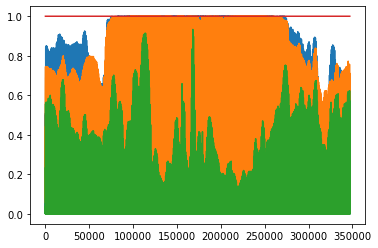

In [46]:
plt.plot(X)

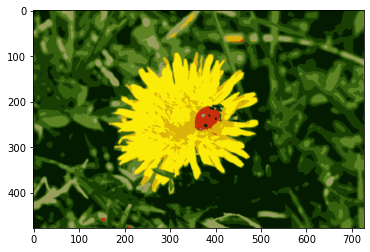

In [45]:
X = image.reshape(-1,4)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

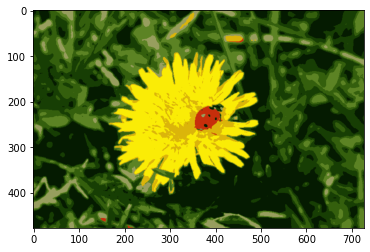

In [37]:
X = image.reshape(-1,4)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [6]:
new_image = []

for i in range(0, len(image)):
    new_image.append([])
    for j in range(0, len(image[0])):
        new_image[i].append(image[i][j].tolist())
        new_image[i][j].append(i / 478)
        new_image[i][j].append(j / 726)
new_image = np.array(new_image)

(347028, 6)


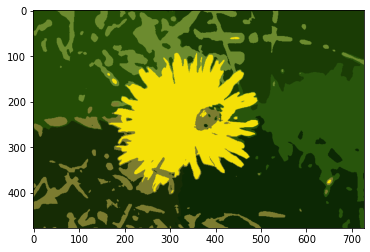

In [7]:
new_X = new_image.reshape(-1,6)
print(new_X.shape)
new_kmeans = KMeans(n_clusters = 8).fit(new_X)
new_segmented_img = new_kmeans.cluster_centers_[new_kmeans.labels_]
new_segmented_img = new_segmented_img.reshape(new_image.shape)
plt.imshow(new_segmented_img[:, :, :4])

In [65]:
new_segmented_img

array([[[6.98151238e+00, 9.64949593e+00, 5.74434800e+00, 5.89221750e+00,
         6.98151238e+00, 9.64949593e+00],
        [5.74434800e+00, 5.89221750e+00, 6.98151238e+00, 9.64949593e+00,
         5.74434800e+00, 5.89221750e+00],
        [6.98151238e+00, 9.64949593e+00, 5.74434800e+00, 5.89221750e+00,
         6.98151238e+00, 9.64949593e+00],
        ...,
        [3.14540178e-01, 4.05698973e-01, 3.88218290e-02, 1.00000000e+00,
         1.27417906e+02, 5.96644084e+02],
        [6.98151238e+00, 9.64949593e+00, 5.74434800e+00, 5.89221750e+00,
         1.08944868e+02, 4.94170199e+02],
        [3.14540178e-01, 4.05698973e-01, 3.88218290e-02, 1.00000000e+00,
         1.27417906e+02, 5.96644084e+02]],

       [[6.98151238e+00, 9.64949593e+00, 5.74434800e+00, 5.89221750e+00,
         6.98151238e+00, 9.64949593e+00],
        [5.74434800e+00, 5.89221750e+00, 6.98151238e+00, 9.64949593e+00,
         5.74434800e+00, 5.89221750e+00],
        [6.98151238e+00, 9.64949593e+00, 5.74434800e+00, 5.892217